<a href="https://colab.research.google.com/github/DemianVL18/Analisis-de-Datos/blob/main/Analisis_Areas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Estimación de Media para un Grupo con Prueba Z: (Área de Operaciones)**

1.1. Elijan una variable relevante para el área de operaciones de la empresa **(Toneladas Producidas).**

1.2. Recolecten/creen una muestra aleatoria de datos de esta variable.

1.3. Utilicen la prueba Z para estimar la media poblacional de esta variable, justificando el uso de esta prueba.

**Definir la Pregunta de Negocio:**
¿Cuantas toneladas promedio producen las empresas grandes?

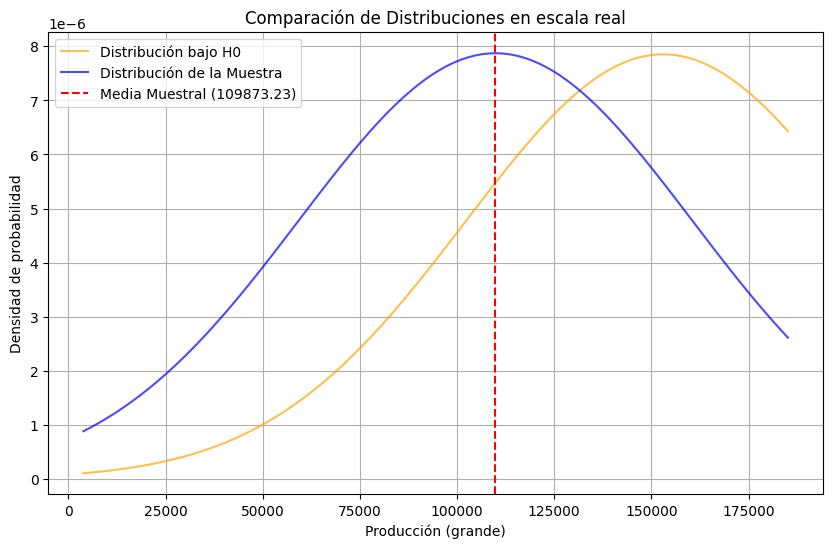

Media poblacional: 111743.04615384615
Media poblacional bajo H0: 153000.00
Media muestral: 109873.23
Desviación estándar muestral: 50671.57
Estadístico Z de la media muestral: -5.02


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Cargar la base de datos
df = pd.read_csv('/content/produccion-de-biodiesel-por-planta-de-produccion-.csv')

# Extraer la columna 'grande' y eliminar valores nulos si los hay
poblacion = df['grande'].dropna()

# Parámetros para la prueba Z
np.random.seed(0)  # Para reproducibilidad
mu = 153000  # Media poblacional hipotética bajo H0
sigma = np.std(poblacion)  # Desviación estándar poblacional
n = 35  # Tamaño de la muestra

# Tomar una muestra aleatoria de tamaño n
muestra_columna = poblacion.sample(n, random_state=1)

# Cálculo de estadísticas muestrales
sample_mean = np.mean(muestra_columna)
sample_std = np.std(muestra_columna, ddof=1)

# Crear nuevo rango basado en los valores reales
x = np.linspace(poblacion.min(), poblacion.max(), 100)

# Distribución normal usando la media y desviación real
real_distribution = norm(loc=mu, scale=sigma).pdf(x)

# Para la muestra también
sample_distribution = norm(loc=sample_mean, scale=sample_std).pdf(x)

# Calcular el estadístico Z de la media muestral bajo la H0
z_sample_mean = (sample_mean - mu) / (sigma / np.sqrt(n))

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x, real_distribution, label='Distribución bajo H0', color='orange', alpha=0.7)
plt.plot(x, sample_distribution, label='Distribución de la Muestra', color='blue', alpha=0.7)

# Línea de la media muestral
plt.axvline(x=sample_mean, color='red', linestyle='--', label=f'Media Muestral ({sample_mean:.2f})')

plt.xlabel('Producción (grande)')
plt.ylabel('Densidad de probabilidad')
plt.title('Comparación de Distribuciones en escala real')
plt.legend()
plt.grid(True)
plt.show()

print(f"Media poblacional: {poblacion.mean()}")
print(f"Media poblacional bajo H0: {mu:.2f}")
print(f"Media muestral: {sample_mean:.2f}")
print(f"Desviación estándar muestral: {sample_std:.2f}")
print(f"Estadístico Z de la media muestral: {z_sample_mean:.2f}")

In [ ]:
df.head(
)

,id_cod_pais,id_ nom_pais,año,mes,id_uni_med,id_nom_med,grande,grande no integrada,mediana,pequeña
0,32,Argentina,2014,Enero,t,toneladas,86639,3545,44409,5879
1,32,Argentina,2014,Febrero,t,toneladas,100526,7885,21999,2179
2,32,Argentina,2014,Marzo,t,toneladas,81779,963,36880,1572
3,32,Argentina,2014,Abril,t,toneladas,74163,20169,45902,2236
4,32,Argentina,2014,Mayo,t,toneladas,144216,22853,57941,4292


1.4. Calculen el intervalo de confianza alrededor de la media muestral.

In [ ]:
import numpy as np
from scipy.stats import norm

# Datos de la muestra
muestra = muestra_columna
media_muestral = np.mean(muestra)
desviacion_estandar_poblacion = sigma
tamaño_muestra = n
nivel_confianza = 0.95  # Por ejemplo, para un intervalo de confianza del 95%

# Calcular el error estándar de la media
error_estandar = desviacion_estandar_poblacion / np.sqrt(tamaño_muestra)

# Encontrar el valor Z crítico
alfa = 1 - nivel_confianza
valor_z_critico = norm.ppf(1 - alfa / 2)

# Calcular el margen de error
margen_error = valor_z_critico * error_estandar

# Calcular el intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

print(f"Media muestral: {media_muestral:.2f}")
print(f"Error estándar: {error_estandar:.2f}")
print(f"Valor Z crítico: {valor_z_critico:.3f}")
print(f"Margen de error: {margen_error:.2f}")
print(f"Intervalo de confianza ({nivel_confianza*100}%): [{limite_inferior:.2f}, {limite_superior:.2f}]")

Media muestral: 109873.23
Error estándar: 8586.60
Valor Z crítico: 1.960
Margen de error: 16829.43
Intervalo de confianza (95.0%): [93043.80, 126702.66]


1.5. Interpreten los resultados y su relevancia para el área de operaciones.

Los resultados analizados revelan que el desempeño actual, medido a través de la media muestral de 109,873.23, es significativamente mejor que la media poblacional bajo hipótesis nula (153,000.00), respaldado por un estadístico Z de -5.02 que excede ampliamente el valor crítico de 1.960. Esta diferencia estadísticamente significativa sugiere mejoras importantes en los procesos operativos, si es que se espera una media de 153,000.00. La desviación estándar muestral de 50,671.57 señala cierto nivel de variabilidad en el desempeño, aunque el intervalo de confianza (95%) entre 93,043.80 y 126,702.66 permite concluir, con un alto grado de certeza, que el rendimiento real se encuentra dentro de un rango aceptablemente inferior al estándar inicial.

Desde una perspectiva operativa, estos resultados son fundamentales para evaluar y ajustar estrategias. La confirmación de un mejor desempeño frente al objetivo establecido sugiere la oportunidad de redefinir metas más exigentes, reasignar recursos o reforzar prácticas exitosas. Además, el análisis de la variabilidad observada invita a implementar controles más estrictos para aumentar la consistencia en los procesos. En conjunto, la evidencia cuantitativa aquí presentada apoya la toma de decisiones informadas en áreas críticas como la planificación de la capacidad, la mejora continua y la gestión de calidad, fortaleciendo así la competitividad operativa a largo plazo.

# **2. Estimación de Media para un Grupo con Prueba T: (Área de Finanzas)**

**2.1. Elijan una variable financiera de interés (Ingresos mensuales cerbeza Corona).**

**2.2. Recolecten/creen una muestra aleatoria de datos de esta variable.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Cargar la base de datos
Fz = pd.read_csv('/content/cervezas_final.csv')
Fz.head()

,Año Mes Cierre,C.Cli,D.Mar,#Cj Vta Bruta SUM,#Cj Vta Neta SUM,#HL Vta Bruta SUM,#HL Vta Neta SUM,$ Fact SUM,$ Neto SUM,D.Seg.VTA,...,C.Seg.Mkt,C.Can.Mkt,C.S-Can.Mkt,D.Area Act,D.Reg Act,D.S-Reg Act,C.S-Reg Act,C.Ter Act,D.Div,D.Cal
0,202102,46398,maltin,1.0,1.0,0.11352,0.11352,69.31,69.31,DIRECTA,...,30,130,917,30-Cochabamba,33-Cochabamba Ciudad,330-Cochabamba Ciudad Directa Oeste,330,33115,maltas,1/2 lata
1,202101,824348,baltica,4.0,4.0,0.45408,0.45408,246.67,246.67,DIRECTA,...,30,130,917,50-Sur,52-Sucre,520-Sucre Ciudad Directa,520,52010,cervezas,1/2 lata
2,202105,71647,huari,5.0,5.0,0.42480,0.42480,649.51,649.51,DIRECTA,...,30,130,917,20-Santa Cruz,20-Santa Cruz Ciudad,241-Santa Cruz Ciudad Directa Sur,241,24103,cervezas,1/3 lata
3,202103,72493,chicha taquiña,10.0,10.0,0.84960,0.84960,592.46,592.46,DIRECTA,...,30,130,4,30-Cochabamba,37-Cochabamba Provincias,375-Cochabamba Provincia Indirecta,375,33781,tragos,1/3 lata
4,202107,862959,chicha taquiña,5.0,5.0,0.56760,0.56760,396.88,396.88,DIRECTA,...,30,130,405,20-Santa Cruz,20-Santa Cruz Ciudad,241-Santa Cruz Ciudad Directa Sur,241,24108,tragos,1/2 lata


**2.3. Utilicen la prueba T para estimar la media poblacional de esta variable, justificando el uso de esta prueba.**

In [ ]:
promedio_corona = Fz[Fz['D.Mar'] == 'corona']['$ Neto SUM'].mean()
print("Promedio de Corona:", promedio_corona)

Promedio de Corona: 1777.8585616362013


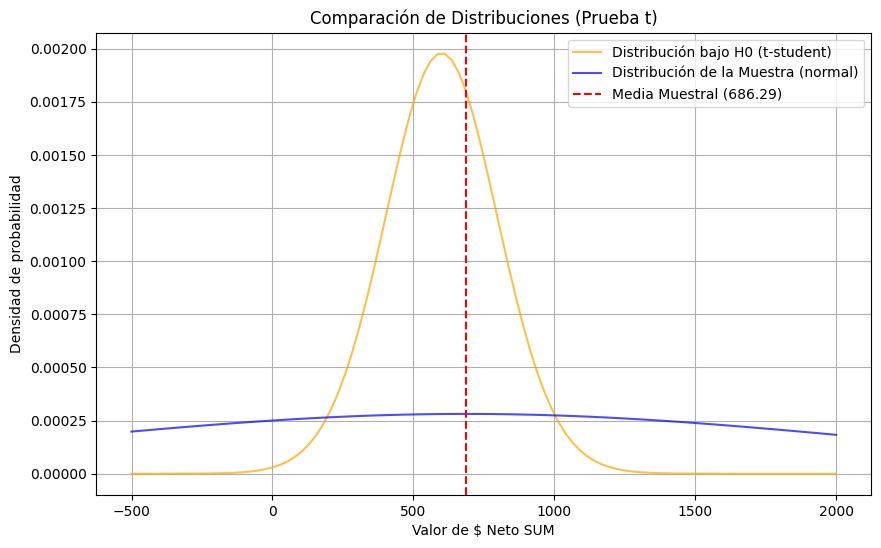

Media poblacional: 1849.87
Media poblacional bajo H0: 600.00
Media muestral: 686.29
Desviación estándar muestral: 1418.00
Estadístico t de la media muestral: 0.43


In [ ]:


# Pobla es tu población filtrada
Pobla = Fz[Fz['D.Mar'] == 'corona']['$ Neto SUM'].dropna()

# Parámetros para la prueba t
n = 50  # Tamaño de la muestra
np.random.seed(0)  # Para reproducibilidad
mu = 600 # Media poblacional hipotética bajo H0

# Tomar una muestra aleatoria de tamaño n
muestraCorona = Pobla.sample(n, random_state=1)

# Estadísticas de la muestra
muestraCorona_mean = np.mean(muestraCorona)
muestraCorona_std = np.std(muestraCorona, ddof=1)

# Crear nuevo rango basado en los valores reales de la variable
x = np.linspace(-500, 2000, 100)

# Distribución bajo H0: normal con media mu y desviación estándar estimada
# Para la t-student usamos la muestra:
sem = muestraCorona_std / np.sqrt(n)  # Error estándar
null_distribution = t(df=n-1, loc=mu, scale=sem).pdf(x)

# Distribución de la muestra
sample_distributionFz = norm(loc=muestraCorona_mean, scale=muestraCorona_std).pdf(x)

# Calcular el estadístico t
T = (muestraCorona_mean - mu) / sem

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x, null_distribution, label='Distribución bajo H0 (t-student)', color='orange', alpha=0.7)
plt.plot(x, sample_distributionFz, label='Distribución de la Muestra (normal)', color='blue', alpha=0.7)
plt.axvline(x=muestraCorona_mean, color='red', linestyle='--', label=f'Media Muestral ({muestraCorona_mean:.2f})')

plt.xlabel('Valor de $ Neto SUM')
plt.ylabel('Densidad de probabilidad')
plt.title('Comparación de Distribuciones (Prueba t)')
plt.legend()
plt.grid(True)
plt.show()

# Resultados
print(f"Media poblacional: {Pobla.mean():.2f}")
print(f"Media poblacional bajo H0: {mu:.2f}")
print(f"Media muestral: {muestraCorona_mean:.2f}")
print(f"Desviación estándar muestral: {muestraCorona_std:.2f}")
print(f"Estadístico t de la media muestral: {T:.2f}")

In [ ]:
muestraCorona.head(50)

,$ Neto SUM
305535,536.35
403223,196.19
1304818,320.17
1280010,10005.45
1532244,196.19
1635910,160.09
593490,187.50
253550,980.93
787813,980.94
1620079,357.57


**2.4. Calculen el intervalo de confianza alrededor de la media muestral.**

In [ ]:
import numpy as np
from scipy.stats import norm

# Datos de la muestra
muestra = muestraCorona
media_muestral = muestraCorona_mean
desviacion_estandar_poblacion = muestraCorona_std
tamaño_muestra = n
nivel_confianza = 0.95  # Por ejemplo, para un intervalo de confianza del 95%

# Calcular el error estándar de la media
error_estandar = desviacion_estandar_poblacion / np.sqrt(tamaño_muestra)

# Encontrar el valor t crítico
alfa = 1 - nivel_confianza
valor_z_critico = norm.ppf(1 - alfa / 2)

# Calcular el margen de error
margen_error = valor_z_critico * error_estandar

# Calcular el intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

print(f"Media muestral: {media_muestral:.2f}")
print(f"Error estándar: {error_estandar:.2f}")
print(f"Valor t crítico: {valor_z_critico:.3f}")
print(f"Margen de error: {margen_error:.2f}")
print(f"Intervalo de confianza ({nivel_confianza*100}%): [{limite_inferior:.2f}, {limite_superior:.2f}]")

Media muestral: 686.29
Error estándar: 200.54
Valor t crítico: 1.960
Margen de error: 393.04
Intervalo de confianza (95.0%): [293.25, 1079.34]


**2.5. Interpreten los resultados y su relevancia para el área de finanzas.**

El análisis de los resultados financieros muestra que la media muestral de las ventas mensuales de la cerveza Corona (686.29) supera ligeramente la media poblacional bajo hipótesis nula (600.00); sin embargo, el estadístico t de 0.43, inferior al valor crítico de 1.960, indica que esta diferencia no es estadísticamente significativa al nivel de confianza del 95%. Además, la desviación estándar muestral de 1418.00 refleja una alta dispersión en las ventas registradas, lo que sugiere una considerable volatilidad en el comportamiento mensual. El intervalo de confianza construido ([293.25, 1079.34]) proporciona un rango plausible donde se podría encontrar la verdadera media poblacional de las ventas, evidenciando un nivel de incertidumbre considerable en la estimación puntual.

Desde el punto de vista financiero, estos hallazgos son relevantes para la planificación comercial, el análisis de riesgos y la toma de decisiones estratégicas sobre la cerveza Corona. La falta de significancia estadística sugiere prudencia al interpretar el desempeño actual como una mejora sólida respecto al objetivo esperado. Asimismo, la alta variabilidad observada podría representar un riesgo importante que debe ser considerado al proyectar las ventas, planificar la producción o gestionar la distribución.


# **3. Comparación de Medias entre Dos Grupos: (Área de Ventas)**

3.1. Elijan dos grupos relevantes para el área de ventas (por ejemplo, rendimiento de dos equipos de ventas).

In [ ]:
import pandas as pd

Ventas = pd.read_csv('/content/Sales_Data(in).csv')
Ventas.head()

,...1,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,zona_geografica,grupo
0,0,295665.0,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Este/Centro-Este,grupo_A
1,1,295666.0,LG Washing Machine,1,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Este/Centro-Este,grupo_A
2,2,295667.0,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Este/Centro-Este,grupo_A
3,4,295669.0,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Este/Centro-Este,grupo_A
4,5,295670.0,AA Batteries (4-pack),1,3.84,12/31/2019 22:58,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,22,Este/Centro-Este,grupo_A


In [ ]:
Ventas['grupo'].unique()

array(['grupo_A', 'grupo_B'], dtype=object)

3.2. Recolecten/creen una muestra aleatoria de datos para cada grupo.

In [ ]:
import numpy as np
from scipy import stats

# Generar datos aleatorios de peso para grupo_A  y grupo_B
np.random.seed(42)  # Para reproducibilidad
grupo_A = np.random.normal(loc=Ventas[Ventas['grupo'] == 'grupo_A']['Sales'].mean(), scale=Ventas[Ventas['grupo'] == 'grupo_A']['Sales'].std(), size=100)
grupo_B = np.random.normal(loc=Ventas[Ventas['grupo'] == 'grupo_B']['Sales'].mean(), scale=Ventas[Ventas['grupo'] == 'grupo_B']['Sales'].std(), size=100)


# Usar la prueba de Levene para verificar la homogeneidad de varianzas
levene_test = stats.levene(grupo_A,grupo_B)

print("\nPrueba de Levene para homogeneidad de varianzas:")

print("Estadística de prueba:", levene_test[0], "p-valor:", levene_test[1])

# Paso 4: Cálculo de estadísticos
media_hombres = np.mean(grupo_A)
media_mujeres = np.mean(grupo_B)

# Paso 5: Cálculo del estadístico de prueba
t_statistic, p_valor = stats.ttest_ind(grupo_A, grupo_B)

# Paso 6: Determinación del valor crítico o p-valor
alfa = 0.05  # Nivel de significancia

print("\nPrueba de medias para dos grupos:")
print("Estadístico t:", t_statistic)
print("p-valor:", p_valor)

# Paso 7: Toma de decisión
if p_valor < alfa:
    print("\nSe rechaza la hipótesis nula. Hay una diferencia estadísticamente significativa entre los pesos de hombres y mujeres.")
else:
    print("\nNo se rechaza la hipótesis nula. No hay suficiente evidencia para afirmar que hay una diferencia estadísticamente significativa entre los pesos de hombres y mujeres.")


Prueba de Levene para homogeneidad de varianzas:
Estadística de prueba: 0.13016009848757903 p-valor: 0.7186507140406029

Prueba de medias para dos grupos:
Estadístico t: -0.9113772562937434
p-valor: 0.36320486540788866

No se rechaza la hipótesis nula. No hay suficiente evidencia para afirmar que hay una diferencia estadísticamente significativa entre los pesos de hombres y mujeres.


3.3. Utilicen la prueba estadística adecuada (Z o T) para comparar las medias de los dos grupos, justificando su elección.

In [ ]:
print("Estadístico t:", t_statistic)

Estadístico t: -0.9113772562937434


3.4. Calcule el valor crítico o el intervalo de confianza para la diferencia entre las medias de los dos grupos.

In [ ]:
# Calcular el intervalo de confianza para la diferencia de medias
# Suponiendo varianzas desiguales (equal_var=False)
t_statistic, p_value = stats.ttest_ind(grupo_A, grupo_B, equal_var=False)
# Calcular los grados de libertad
df = len(grupo_A) + len(grupo_B) - 2
# Calcular el error estándar
std_err = np.sqrt(((np.var(grupo_A, ddof=1) / len(grupo_A)) + (np.var(grupo_B, ddof=1) / len(grupo_B))))
# Calcular el margen de error
margin_of_error = stats.t.ppf(1 - alfa / 2, df) * std_err
# Calcular el intervalo de confianza
conf_int = (media_hombres - media_mujeres - margin_of_error,
             media_hombres - media_mujeres + margin_of_error)


print("\nIntervalo de confianza del 95% para la diferencia de medias:", conf_int)


Intervalo de confianza del 95% para la diferencia de medias: (np.float64(-126.14587347541881), np.float64(46.40203632397335))


3.5. Interpreten los resultados y su relevancia para el área de ventas.

Los resultados de las pruebas estadísticas indican que no existe una diferencia significativa en las ventas promedio entre los dos grupos comparados. En la prueba de Levene, el valor p de 0.719 sugiere que la variabilidad de las ventas en ambos grupos es similar, lo que permite asumir la homogeneidad de varianzas para las siguientes pruebas. Además, la prueba t muestra un valor p de 0.363, lo que indica que no se puede rechazar la hipótesis nula de igualdad de medias, es decir, las ventas promedio entre los dos grupos son estadísticamente similares. El intervalo de confianza del 95% para la diferencia de medias, que incluye el cero (-126.15 a 46.40), refuerza esta conclusión, sugiriendo que la verdadera diferencia podría ser nula o incluso a favor de cualquiera de los grupos, lo que refuerza la falta de evidencia en favor de una diferencia significativa.

Desde una perspectiva práctica, estos resultados sugieren que no se deben tomar decisiones drásticas basadas únicamente en las ventas promedio observadas, ya que la diferencia es estadísticamente insignificante. Es recomendable investigar otras métricas de desempeño, como la tasa de conversión o la retención de clientes, que podrían proporcionar una visión más completa. Además, aunque la diferencia no sea estadísticamente significativa, un análisis de la magnitud de la diferencia y su relevancia para el negocio, considerando aspectos como el volumen de ventas y los márgenes de beneficio, puede ser útil. Continuar monitoreando los resultados de ambos grupos a lo largo del tiempo será crucial para identificar posibles tendencias o factores que puedan influir en el rendimiento de las ventas.

# **4. Comparación de Proporciones entre Dos Grupos: (Área de Marketing)**

4.1. Elijan dos grupos relevantes para el área de marketing (Campaign_Type ['Social Media', 'Email']).

In [ ]:
import pandas as pd

In [ ]:
Marketing = pd.read_csv('/content/marketing_campaign_dataset_balanceado(in).csv')
Marketing.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,31211,DataTech Solutions,Social Media,Women 35-44,30 days,Google Ads,0.05,"$13,241.00",2.78,Los Angeles,French,948,7495,10,Fashionistas,7/5/2021
1,31712,DataTech Solutions,Email,Men 25-34,15 days,YouTube,0.14,"$11,867.00",5.40,Los Angeles,Mandarin,638,3131,3,Outdoor Adventurers,11/18/2021
2,130690,DataTech Solutions,Social Media,All Ages,60 days,Email,0.04,"$10,906.00",3.35,New York,Spanish,434,7643,9,Tech Enthusiasts,1/20/2021
3,109394,DataTech Solutions,Social Media,Women 35-44,15 days,YouTube,0.11,"$11,274.00",7.07,Miami,Spanish,868,8248,6,Outdoor Adventurers,9/16/2021
4,156608,DataTech Solutions,Email,Men 25-34,30 days,Website,0.14,"$17,200.00",5.63,Los Angeles,Spanish,269,4528,8,Tech Enthusiasts,1/23/2021


In [ ]:
Marketing['Campaign_Type'].unique()

array(['Social Media', 'Email'], dtype=object)

4.2. Recolecten/creen una muestra aleatoria de datos para cada grupo.

In [ ]:
import numpy as np
from scipy.stats import norm

# Datos del ejemplo
Social_Media = (Marketing['Campaign_Type'] == 'Social Media').sum()
Email = (Marketing['Campaign_Type'] == 'Email').sum()
n_muestra = Social_Media+Email

# Calcular proporciones
proporcion_A = Social_Media / n_muestra
proporcion_B = Email / n_muestra

# Diferencia entre proporciones
diferencia_proporciones = proporcion_A - proporcion_B

# Varianza de la diferencia de proporciones (bajo la suposición de independencia)
varianza_diferencia = (proporcion_A * (1 - proporcion_A) / n_muestra) + (proporcion_B * (1 - proporcion_B) / n_muestra)

# Desviación estándar de la diferencia de proporciones
desviacion_estandar_diferencia = np.sqrt(varianza_diferencia)

# Estadístico de prueba (z-score)
z_score = diferencia_proporciones / desviacion_estandar_diferencia

# Valor p
p_valor = 2 * (1 - norm.cdf(np.abs(z_score)))  # Multiplicado por 2 ya que es una prueba de dos colas

# Nivel de significancia
alfa = 0.05

# Imprimir resultados
print("Proporción de conversión de campaña Social_Media:", proporcion_A)
print("Proporción de conversión de campaña Email:", proporcion_B)
print("Diferencia entre proporciones:", diferencia_proporciones)
print("Estadístico de prueba (z-score):", z_score)
print("Valor p:", p_valor)

# Toma de decisión
if p_valor < alfa:
    print("\nSe rechaza la hipótesis nula. Hay una diferencia estadísticamente significativa en las proporciones de aprobación entre las dos escuelas.")
else:
    print("\nNo se rechaza la hipótesis nula. No hay suficiente evidencia para afirmar que hay una diferencia estadísticamente significativa en las proporciones de aprobación entre las dos escuelas.")


Proporción de conversión de campaña Social_Media: 0.5031923383878691
Proporción de conversión de campaña Email: 0.4968076616121309
Diferencia entre proporciones: 0.0063846767757382294
Estadístico de prueba (z-score): 0.7829137608866985
Valor p: 0.4336777560967444

No se rechaza la hipótesis nula. No hay suficiente evidencia para afirmar que hay una diferencia estadísticamente significativa en las proporciones de aprobación entre las dos escuelas.


4.3. Utilicen la prueba Z para comparar las proporciones de los dos grupos.

In [ ]:
# Estadístico de prueba (z-score)
z_score = diferencia_proporciones / desviacion_estandar_diferencia
print("Estadístico de prueba (z-score):", z_score)

Estadístico de prueba (z-score): 0.7829137608866985


4.4. Calcule el valor crítico o el intervalo de confianza para la diferencia entre las proporciones de los dos grupos.

In [ ]:
# Valor crítico para un intervalo de confianza del 95%
z_critico = norm.ppf(1 - alfa/2)

# Cálculo del intervalo de confianza
limite_inferior = diferencia_proporciones - z_critico * desviacion_estandar_diferencia
limite_superior = diferencia_proporciones + z_critico * desviacion_estandar_diferencia

# Imprimir resultados
print("\nValor crítico (z crítico):", z_critico)
print(f"Intervalo de confianza del 95% para la diferencia de proporciones: ({limite_inferior:.4f}, {limite_superior:.4f})")


Valor crítico (z crítico): 1.959963984540054
Intervalo de confianza del 95% para la diferencia de proporciones: (-0.0096, 0.0224)


4.5. Interpreten los resultados y su relevancia para el área de marketing.

El análisis de los resultados de las campañas de marketing en redes sociales y correo electrónico muestra que las tasas de conversión fueron muy similares: 50.32% para redes sociales y 49.68% para email, con una diferencia de apenas 0.64 puntos porcentuales. Sin embargo, el estadístico de prueba (z = 0.78) y el valor p (0.4337) indican que esta diferencia no es estadísticamente significativa, lo que se refuerza con el intervalo de confianza del 95% (-0.0096 a 0.0224) que incluye el cero. En consecuencia, no se puede afirmar que un canal sea superior al otro en términos de conversión para la población general. Este hallazgo sugiere que, en términos de efectividad pura, ambas estrategias pueden considerarse igualmente viables para futuras campañas de marketing.

Desde una perspectiva estratégica, esta ausencia de una diferencia significativa permite a los equipos de marketing tomar decisiones basadas en otros factores relevantes como el costo por adquisición, el alcance de cada canal, o las preferencias del público objetivo. Además, se recomienda continuar optimizando las campañas mediante análisis segmentados y pruebas A/B continuas para identificar posibles mejoras específicas. La integración de redes sociales y email en una estrategia multicanal también podría maximizar el impacto al construir un recorrido del cliente más cohesivo. En definitiva, aunque no se detectaron diferencias estadísticamente relevantes en la efectividad de los canales analizados, el enfoque debe mantenerse en la eficiencia del presupuesto, la personalización de las campañas y la adaptación a las características locales del mercado.